# Adding a densely connected classifier on top of the convolution base

In [4]:
from keras import models
from keras import layers
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape =(150,150,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
print("This is the number of trainable weights before freezing the conv base:"
,len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30


In [8]:
conv_base.trainable = False

In [9]:
print('This is the number of trainable weights after freezing the conv base:',
      len(model.trainable_weights ))

This is the number of trainable weights after freezing the conv base: 4


# Training the model end to end with a frozen convolutional base

In [16]:
train_dir = 'path where data store'
validation_dir = "path where data store"

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 40,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_genrator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 2e-5),
              metrics = ['acc'])

history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 30,
                    validation_data = validation_genrator,
                    validation_steps = 50)

Found 2002 images belonging to 2 classes.
Found 1009 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 438s 4s/step - acc: 0.6190 - loss: 0.6504 - val_acc: 0.8300 - val_loss: 0.4607
Epoch 2/30
  1/100 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - acc: 0.6500 - loss: 0.5618

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 642ms/step - acc: 0.6500 - loss: 0.5618 - val_acc: 0.8889 - val_loss: 0.4170
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - acc: 0.7730 - loss: 0.5026 - val_acc: 0.8660 - val_loss: 0.3730
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9500 - loss: 0.3710 - val_acc: 0.8889 - val_loss: 0.3720
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 249ms/step - acc: 0.7982 - loss: 0.4687 - val_acc: 0.8620 - val_loss: 0.3526
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - acc: 0.8500 - loss: 0.4145 - val_acc: 0.7778 - val_loss: 0.4937
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 242ms/step - acc: 0.8038 - loss: 0.4368 - val_acc: 0.8760 - val_loss: 0.3192
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - acc: 0.8500 - loss: 0.3372 - val_acc: 0.7778 - val_loss: 0.5703
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 234ms/step - acc: 0.8125 - loss: 0.4135 - val_acc: 0.8850 - val_loss: 0.2924
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 419u

# Plotting the results

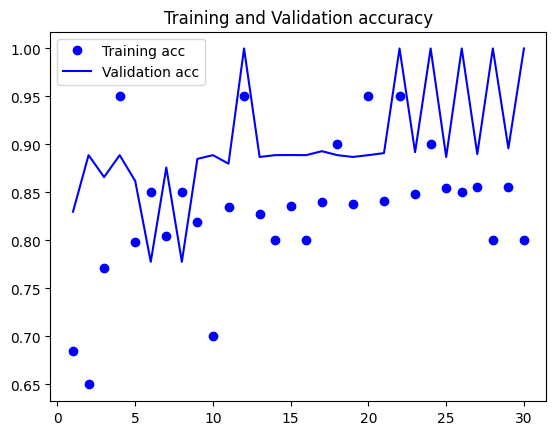

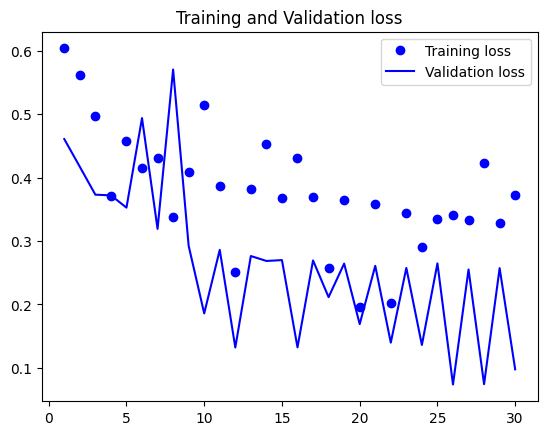

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss , 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()